## Regresion Polinomial & Feature engineering

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [48]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [49]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

## Análisis exploratorio

Gráficos de dispersión


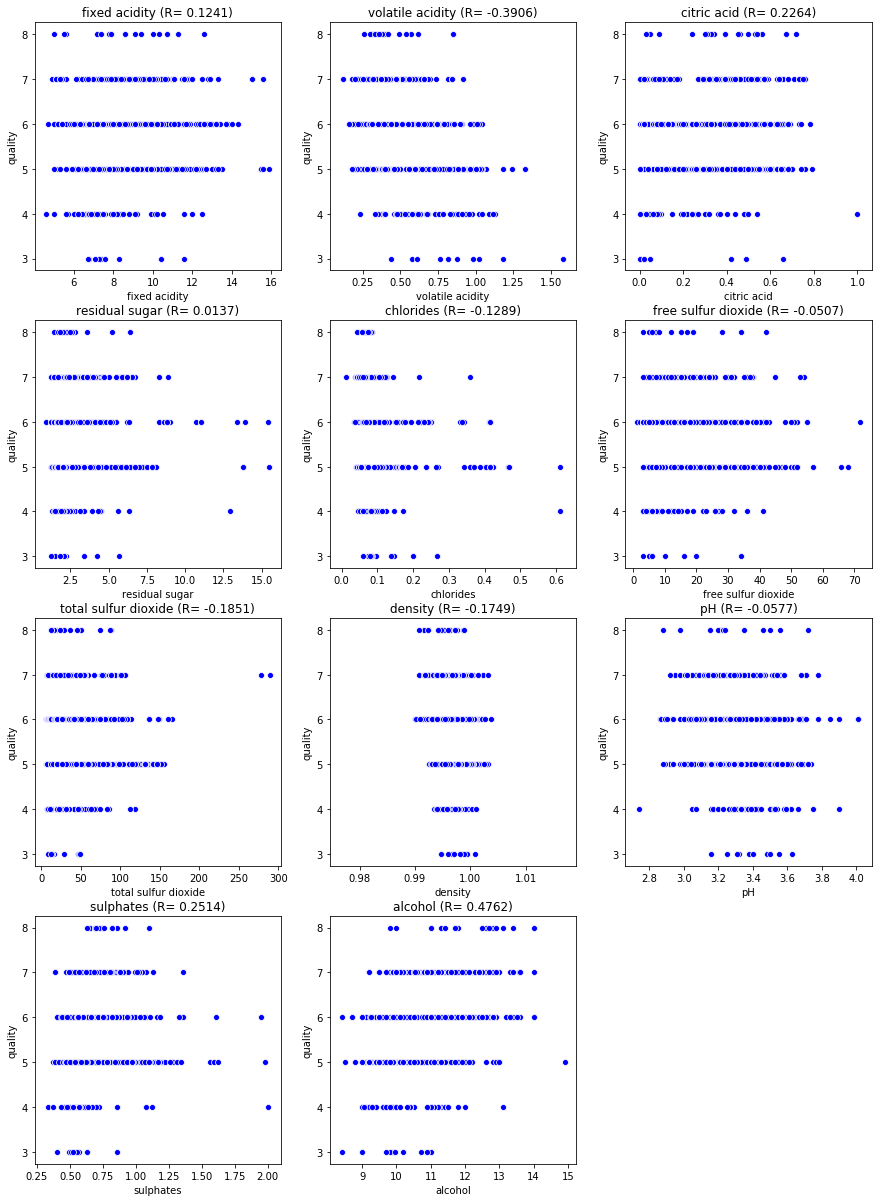

In [50]:
#Análisis exploratorio
fig = plt.figure()
fig.set_size_inches(15, 21)


#Obtener las columnas del dataframe
columns=list(data)
currentAxis=1

#Dibujar todos los graficos
for i in columns:
    if(i!='quality'):
        ax = fig.add_subplot(4, 3, currentAxis)
        #Calcular el coeficiente de correlación R
        tCorr=" (R= "+str(round(np.corrcoef(data[i],data['quality'])[0, 1],4))+")"
        sns.scatterplot(x=data[i], y=data['quality'], ax=ax,color="b").set_title(i+tCorr)
        currentAxis=currentAxis+1

Debido a los valores de correlación, las variables a utilizar son sulphates y alcohol.
Creamos un nuevo dataset

In [51]:
#Realizar el feature engineering
#'citric acid' and 'sulphates' serán nuestras características a utilizar y sus combinaciones
data['(alcohol)2']=data['alcohol']**2
data['(sulphates)2']=data['sulphates']**2
data['(sulphates)*(alcohol)']=data['sulphates']*data['alcohol']
data['bias']=1

#Escoger los valores a utilizar para nuestro dataframe
dataset=pd.DataFrame()

dataset=data.filter(['bias','alcohol','sulphates','(sulphates)*(alcohol)','(alcohol)2','(sulphates)2'], axis=1)

dataset.head()

,bias,alcohol,sulphates,(sulphates)*(alcohol),(alcohol)2,(sulphates)2
0,1,9.4,0.56,5.264,88.36,0.3136
1,1,9.8,0.68,6.664,96.04,0.4624
2,1,9.8,0.65,6.370,96.04,0.4225
3,1,9.8,0.58,5.684,96.04,0.3364
4,1,9.4,0.56,5.264,88.36,0.3136


## Regresión múltiple
Realizamos la regresión con las características elegidas

In [52]:
# Caracteristicas

X  = tf.placeholder(tf.float32)
Y  = tf.placeholder(tf.float32)

featureCount=6

    
W    = tf.Variable(tf.zeros([6, 1]), name="Weights")

Y_ = tf.matmul(X, W)

cost = 0.5*tf.reduce_mean(tf.pow(Y_ - Y, 2))

learning_rate = 0.0001

optFunction = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epochCount = 1001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(epochCount):
        sess.run(optFunction, feed_dict={X: dataset.iloc[:, 0:featureCount], Y: data['quality']})
        tcost = sess.run(cost, feed_dict={X: dataset.iloc[:, 0:featureCount], Y: data['quality']})
        
        if i % 500 == 0:
            print('Iteración'+str(i))
            print('Error:'+str(tcost))
            print('Parámetros:')
            print(sess.run(W))

Iteración0
Error:2.1462917
Parámetros:
[[0.0005636 ]
 [0.00587442]
 [0.00037093]
 [0.00387576]
 [0.0618686 ]
 [0.00026031]]
Iteración500
Error:0.90144044
Parámetros:
[[0.01191798]
 [0.06617796]
 [0.00671632]
 [0.03124258]
 [0.04092544]
 [0.0043618 ]]
Iteración1000
Error:0.8228124
Parámetros:
[[0.02253152]
 [0.12311779]
 [0.01226163]
 [0.05328479]
 [0.03414294]
 [0.00752284]]
